In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

EDA

In [87]:
df = pd.read_csv(r"C:\Users\epelo\Downloads\heart.csv")
df = df[:919]

In [88]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [89]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [90]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [91]:
df.shape

(918, 12)

Text(0, 0.5, 'Count')

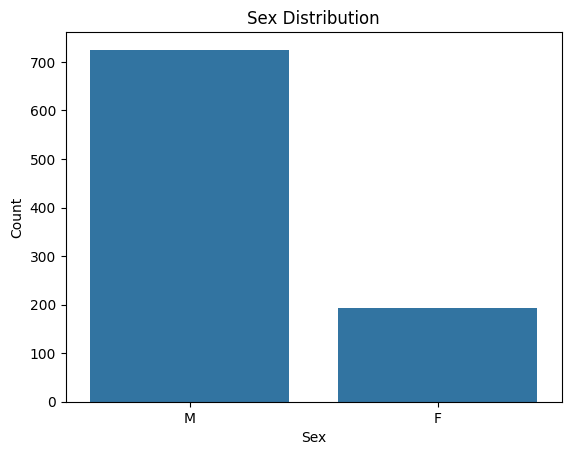

In [92]:
sns.countplot(data=df,x='Sex');
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

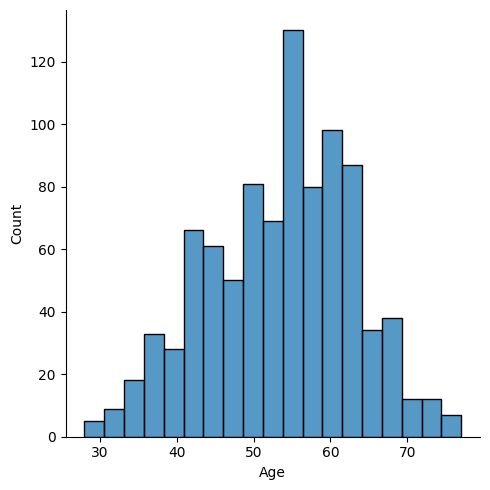

In [93]:
sns.displot(df['Age'])

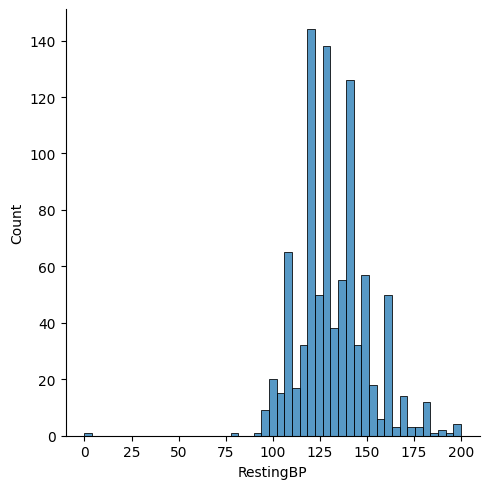

In [94]:
sns.displot(df['RestingBP'])

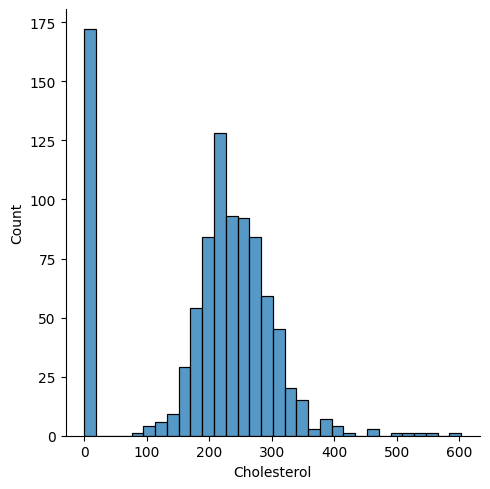

In [95]:
sns.displot(df['Cholesterol'])

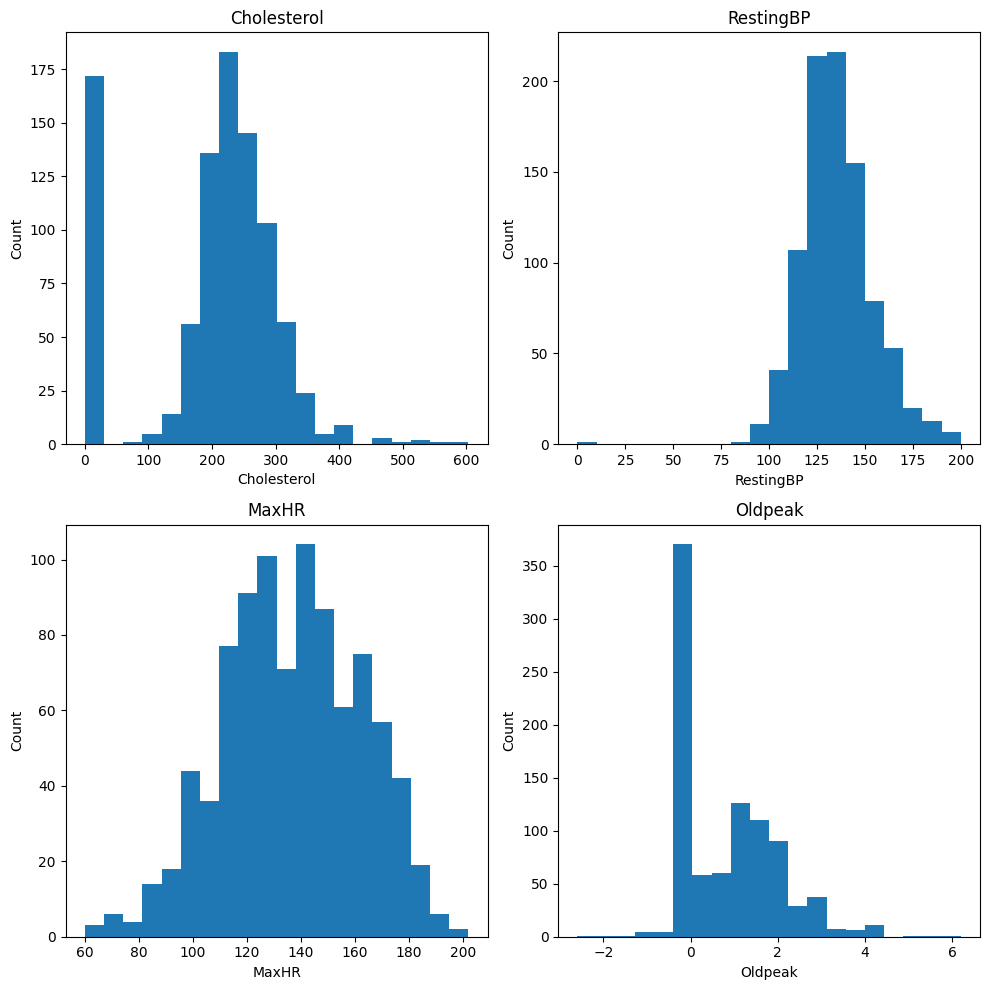

In [96]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].hist(df["Cholesterol"], bins=20)
ax[0, 0].set_xlabel("Cholesterol")
ax[0, 0].set_ylabel("Count")
ax[0, 0].set_title("Cholesterol")

ax[0, 1].hist(df["RestingBP"], bins=20)
ax[0, 1].set_xlabel("RestingBP")
ax[0, 1].set_ylabel("Count")
ax[0, 1].set_title("RestingBP")

ax[1, 0].hist(df["MaxHR"], bins=20)
ax[1, 0].set_xlabel("MaxHR")
ax[1, 0].set_ylabel("Count")
ax[1, 0].set_title("MaxHR")

ax[1, 1].hist(df["Oldpeak"], bins=20)
ax[1, 1].set_xlabel("Oldpeak")
ax[1, 1].set_ylabel("Count")
ax[1, 1].set_title("Oldpeak")

plt.tight_layout()
plt.show()

DATA VALIDATION

In [97]:
# Checking Duplicate Values

df_data = df.duplicated().any()

In [98]:
df_data

False

In [99]:
# Checking Null Values

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [101]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

ENCODER

In [102]:
df["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [103]:
df["Sex"]=df["Sex"].replace(["M","F"],[0,1])

C:\Users\epelo\AppData\Local\Temp\ipykernel_1748\2309053901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"]=df["Sex"].replace(["M","F"],[0,1])


In [104]:
df["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [105]:
df["ChestPainType"]=df["ChestPainType"].replace(["ASY","NAP","ATA","TA"],[0,1,2,3])

C:\Users\epelo\AppData\Local\Temp\ipykernel_1748\1212675527.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ChestPainType"]=df["ChestPainType"].replace(["ASY","NAP","ATA","TA"],[0,1,2,3])


In [106]:
df["RestingECG"].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [107]:
df["RestingECG"]=df["RestingECG"].replace(["Normal","LVH","ST"],[0,1,2])

C:\Users\epelo\AppData\Local\Temp\ipykernel_1748\3771252260.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["RestingECG"]=df["RestingECG"].replace(["Normal","LVH","ST"],[0,1,2])


In [108]:
df["ExerciseAngina"].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [109]:
df["ExerciseAngina"]=df["ExerciseAngina"].replace(["N","Y"],[0,1])

C:\Users\epelo\AppData\Local\Temp\ipykernel_1748\231242308.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ExerciseAngina"]=df["ExerciseAngina"].replace(["N","Y"],[0,1])


In [110]:
df["ST_Slope"].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [111]:
df["ST_Slope"]=df["ST_Slope"].replace(["Flat","Up","Down"],[0,1,2])

C:\Users\epelo\AppData\Local\Temp\ipykernel_1748\1469646052.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ST_Slope"]=df["ST_Slope"].replace(["Flat","Up","Down"],[0,1,2])


In [112]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,2,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,0,1
914,68,0,0,144,193,1,0,141,0,3.4,0,1
915,57,0,0,130,131,0,0,115,1,1.2,0,1
916,57,1,2,130,236,0,1,174,0,0.0,0,1


In [113]:
cor=df.corr()
cor

# corr = Mengetahui nilai korelasinya, aplikasi dari perhitungan Pearson Correlation

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,-0.165896,0.254399,-0.095282,0.198039,0.210498,-0.382045,0.215793,0.258612,-0.093424,0.282039
Sex,-0.055750,1.000000,0.168254,-0.005133,0.200092,-0.120076,-0.038320,0.189186,-0.190664,-0.105734,0.066831,-0.305445
ChestPainType,-0.165896,0.168254,1.000000,-0.022168,0.136139,-0.116703,-0.065099,0.343654,-0.416625,-0.245027,0.202675,-0.471354
RestingBP,0.254399,-0.005133,-0.022168,1.000000,0.100893,0.070193,0.117206,-0.112135,0.155101,0.164803,-0.083418,0.107589
Cholesterol,-0.095282,0.200092,0.136139,0.100893,1.000000,-0.260974,-0.042595,0.235792,-0.034166,0.050148,0.007110,-0.232741
FastingBS,0.198039,-0.120076,-0.116703,0.070193,-0.260974,1.000000,0.120774,-0.131438,0.060451,0.052698,-0.043534,0.267291
RestingECG,0.210498,-0.038320,-0.065099,0.117206,-0.042595,0.120774,1.000000,-0.093379,0.098360,0.099935,-0.019403,0.107628
MaxHR,-0.382045,0.189186,0.343654,-0.112135,0.235792,-0.131438,-0.093379,1.000000,-0.370425,-0.160691,0.246927,-0.400421
ExerciseAngina,0.215793,-0.190664,-0.416625,0.155101,-0.034166,0.060451,0.098360,-0.370425,1.000000,0.408752,-0.253181,0.494282
Oldpeak,0.258612,-0.105734,-0.245027,0.164803,0.050148,0.052698,0.099935,-0.160691,0.408752,1.000000,-0.097323,0.403951


STANDARDIZATION

In [114]:
from sklearn import preprocessing
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [115]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,2,140,289,0,0,172,0,0.0,1
1,49,1,1,160,180,0,0,156,0,1.0,0
2,37,0,2,130,283,0,2,98,0,0.0,1
3,48,1,0,138,214,0,0,108,1,1.5,0
4,54,0,1,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,0
914,68,0,0,144,193,1,0,141,0,3.4,0
915,57,0,0,130,131,0,0,115,1,1.2,0
916,57,1,2,130,236,0,1,174,0,0.0,0


In [116]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

SPLIT DATA

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=5)
print("Train set",X_train.shape, y_train.shape)
print("Test set",X_test.shape, y_test.shape)

Train set (734, 11) (734,)
Test set (184, 11) (184,)


In [118]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [119]:
print(X_train_s)
print("\n")
print(X_train_s.shape)

[[ 0.16668234  1.90933748  1.36210426 ... -0.8151068   0.49409577
  -0.9247809 ]
 [ 1.02149343  1.90933748  1.36210426 ... -0.8151068  -0.72447798
   0.71085568]
 [ 1.44889897 -0.52374188  2.43139253 ... -0.8151068  -0.81821443
  -0.9247809 ]
 ...
 [ 0.91464204 -0.52374188  1.36210426 ... -0.8151068  -0.81821443
   0.71085568]
 [-1.97034538 -0.52374188  1.36210426 ... -0.8151068  -0.81821443
   0.71085568]
 [-1.00868291 -0.52374188 -0.77647227 ... -0.8151068  -0.81821443
   0.71085568]]


(734, 11)


In [120]:
print(X_test_s)
print("\n")
print(X_test_s.shape)

[[-1.32923706 -0.52374188 -0.77647227 ...  1.2268331   1.99387886
  -0.9247809 ]
 [-0.58127736 -0.52374188  1.36210426 ... -0.8151068  -0.81821443
   0.71085568]
 [ 0.70093927 -0.52374188 -0.77647227 ...  1.2268331   0.21288644
   2.34649225]
 ...
 [ 0.91464204 -0.52374188  0.292816   ...  1.2268331  -0.81821443
  -0.9247809 ]
 [ 0.70093927 -0.52374188  0.292816   ... -0.8151068   1.99387886
  -0.9247809 ]
 [ 1.76945313 -0.52374188  1.36210426 ... -0.8151068  -0.81821443
   0.71085568]]


(184, 11)


KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=30, metric="manhattan")
classifier.fit(X_train_s, y_train)

y_train_pred = classifier.predict(X_train_s)
print(y_train_pred)
# Akar N

[0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0
 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0
 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1
 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1
 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 

In [122]:
from sklearn import metrics
acc=metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:%.2f\n\n"%(acc))
cm=metrics.confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix: ")
print(cm,"\n\n")
print("-------------------------------------------")
result=metrics.classification_report(y_train, y_train_pred)
print("Classification Report:\n")
print(result)

Accuracy:0.87


Confusion Matrix: 
[[289  48]
 [ 50 347]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       337
           1       0.88      0.87      0.88       397

    accuracy                           0.87       734
   macro avg       0.87      0.87      0.87       734
weighted avg       0.87      0.87      0.87       734



In [123]:
y_pred=classifier.predict(X_test_s)
print(y_pred)

[1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0
 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1
 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0]


In [124]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:%.2f\n\n"%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm,"\n\n")
print("-------------------------------------------")
result=metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

Accuracy:0.90


Confusion Matrix: 
[[68  5]
 [14 97]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        73
           1       0.95      0.87      0.91       111

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



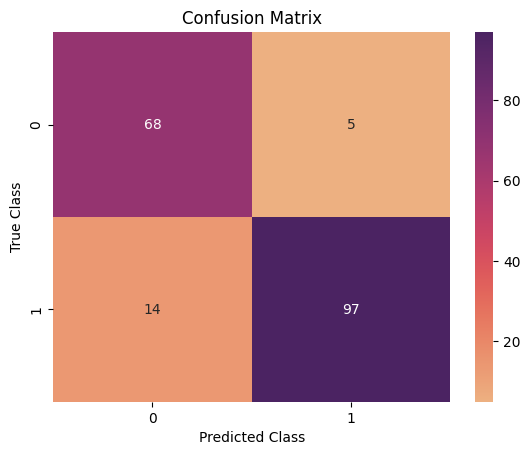

In [125]:
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='flare')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

SVM

In [126]:
from sklearn import svm
svm_classifier=svm.SVC(kernel="rbf")
svm_classifier.fit(X_train_s, y_train)

svm_train_pred = svm_classifier.predict(X_train_s)
print(svm_train_pred)

[0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1
 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0
 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1
 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0
 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1
 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 0 0 1 0 0 1 0 0 

In [127]:
from sklearn import metrics
svm_acc=metrics.accuracy_score(y_train, svm_train_pred)
print("Accuracy:%.2f\n\n"%(svm_acc))
svm_cm=metrics.confusion_matrix(y_train,  svm_train_pred)
print("Confusion Matrix: ")
print(svm_cm,"\n\n")
print("-------------------------------------------")
svm_result=metrics.classification_report(y_train, svm_train_pred)
print("Classification Report:\n")
print(svm_result)

Accuracy:0.90


Confusion Matrix: 
[[287  50]
 [ 24 373]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       337
           1       0.88      0.94      0.91       397

    accuracy                           0.90       734
   macro avg       0.90      0.90      0.90       734
weighted avg       0.90      0.90      0.90       734



In [128]:
svm_y_pred=svm_classifier.predict(X_test_s)
print(svm_y_pred)

[1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0
 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0]


In [129]:
from sklearn import metrics
svm_acc=metrics.accuracy_score(y_test, svm_y_pred)
print("Accuracy:%.2f\n\n"%(svm_acc))
svm_cm=metrics.confusion_matrix(y_test,svm_y_pred)
print("Confusion Matrix: ")
print(svm_cm,"\n\n")
print("-------------------------------------------")
svm_result=metrics.classification_report(y_test, svm_y_pred)
print("Classification Report:\n")
print(svm_result)

Accuracy:0.92


Confusion Matrix: 
[[ 68   5]
 [  9 102]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        73
           1       0.95      0.92      0.94       111

    accuracy                           0.92       184
   macro avg       0.92      0.93      0.92       184
weighted avg       0.93      0.92      0.92       184



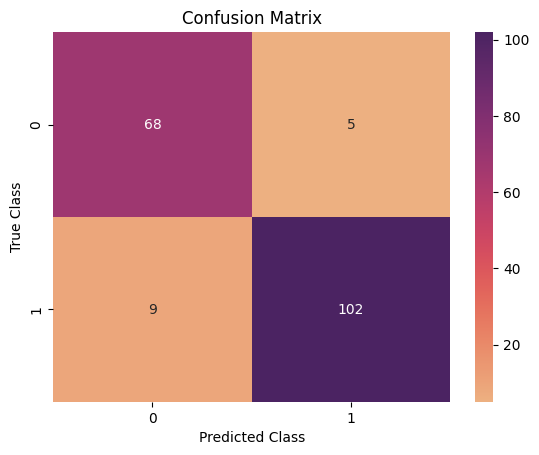

In [130]:
svm_ax=sns.heatmap(svm_cm, annot=True, fmt='d', cmap='flare')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.show()